## Worksheet 3: Support Vector Classifiers
#### Student Name:


In [2]:
import numpy as np
from matplotlib.pyplot import subplots, cm
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.preprocessing import OneHotEncoder

## Exercise 1
This problem involves the OJ data set which is part of the ISLP package.

(a) Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.

In [3]:
from sklearn.model_selection import train_test_split

OJ = load_data('OJ')

X = OJ.drop(columns=['Purchase', 'Store7'])
y = OJ['Purchase']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=800, random_state=42, shuffle=False
)

(b) Fit a support vector classifier to the training data using cost = 0.01, with `Purchase` as the response and the other variables as predictors. How many support points are there?

In [4]:
clf = SVC(kernel='linear', C=0.01)
clf.fit(X_train, y_train)

n_support_vectors = sum(clf.n_support_)
print(n_support_vectors)

608


(c) What are the training and test error rates?

In [5]:
y_train_pred = clf.predict(X_train) #train
y_test_pred = clf.predict(X_test)

train_error_rate = np.mean(y_train_pred != y_train)
test_error_rate = np.mean(y_test_pred != y_test)

print(train_error_rate)
print(test_error_rate)

0.26
0.29259259259259257


(d) Cross-validate to select an optimal cost. Consider values in the range 0.01 to 10.

In [6]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1, 5, 10]}

svc= SVC(kernel='linear')

grid_search = GridSearchCV(svc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_C = grid_search.best_params_['C']
best_score = grid_search.best_score_

In [7]:
print(best_C)
print(best_score)

1
0.8412500000000002


(e) Compute the training and test error rates using this new value for cost. How do these compare to part (c)? Comment on the logic behind this.

We can see that the training and test error rates are lower. A larger cost means that the SVM model will prioritize correctly classifying all training points, even if it means reducing the margin. Thus, the train error rate should be reduced. However, this means that the test error rate can be increased, but in our case, it also decreased.

In [8]:
svc = SVC(kernel='linear', C=1)
svc.fit(X_train, y_train)

y_train_pred = svc.predict(X_train) #train
y_test_pred = svc.predict(X_test) #train

train_error_rate = np.mean(y_train_pred != y_train)
test_error_rate = np.mean(y_test_pred != y_test)

print(train_error_rate)
print(test_error_rate)

0.14875
0.2111111111111111


----

## Exercise 2
In this problem, you will use support vector approaches in order to predict whether a given car gets high or low gas mileage based on the Auto data set.

(a) Create a binary variable that takes on a 1 for cars with gas mileage above the median, and a 0 for cars with gas mileage below the median. Remove non-numerical variables and the original mpg variable.

In [9]:
auto = load_data('Auto')

In [10]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [11]:
median_mpg = auto['mpg'].median()
auto['mpg_binary'] = (auto['mpg'] > median_mpg).astype(int)
auto.drop(columns=['mpg'], inplace=True)
auto = auto.select_dtypes(include=['number'])

auto.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg_binary
name,,,,,,,,
chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,1,0
buick skylark 320,8,350.0,165,3693,11.5,70,1,0
plymouth satellite,8,318.0,150,3436,11.0,70,1,0
amc rebel sst,8,304.0,150,3433,12.0,70,1,0
ford torino,8,302.0,140,3449,10.5,70,1,0


(b) Fit a support vector classifier to the data with various values of cost, in order to predict whether a car gets high or low gas mileage. Report the cross-validation errors associated with different values of this parameter. Comment on your results.

It looks like that best mean test error is with the lowest cost. There is some drop in the mean test error at around 0.5 cost, but overall, the lowest value that is spotted is with the lowest cost. In this case it suggests that a simpler decision boundary generalizes better to new data. The model benefits more from flexibility than strict separation.

In [12]:
X = auto.drop(columns='mpg_binary')
y = auto['mpg_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)

In [13]:
import pandas as pd
param_grid = {'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10]}

svc = SVC(kernel='linear')
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

results = pd.DataFrame(grid_search.cv_results_)
results['mean_test_error'] = 1 - results['mean_test_score']

cv_errors = results[['param_C', 'mean_test_error']]
print(cv_errors)

   param_C  mean_test_error
0    0.001         0.094882
1    0.005         0.094882
2    0.010         0.105859
3    0.050         0.109495
4    0.100         0.109495
5    0.500         0.102222
6    1.000         0.105993
7    2.000         0.113266
8    5.000         0.116902
9   10.000         0.116902


(c) Using the optimal value of cost you found, create a plot of the resulting classifications and discuss its meaning. Be sure to comment on the limitations of this plot to understand your model.  
Hint: When plotting a support vector classifier before, we used only two predictor variables, which leads to an obvious x-y scatterplot. See the [following example](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_margin.html#sphx-glr-auto-examples-svm-plot-svm-margin-py) in the scikit learn documentation for examples of plotting nice SVM boundaries.


Well if we use this data and plot, SVM decision boundary is based only on horsepower and weight, but the dataset includes other important variables. So this doesn't reflect the model's full capability. Also, the plot is only valid if the task is binary classification (like mpg_binary). For multi-class, this kind of plot becomes much more complex.


c:\Users\sahn1\OneDrive\Documentos\2025 Spring Quarter\DATA-5322\WS\venv\Lib\site-packages\ISLP\svm.py:136: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Y_ = (2 * (Y[svm.support_] == svm.classes_[1]) - 1)


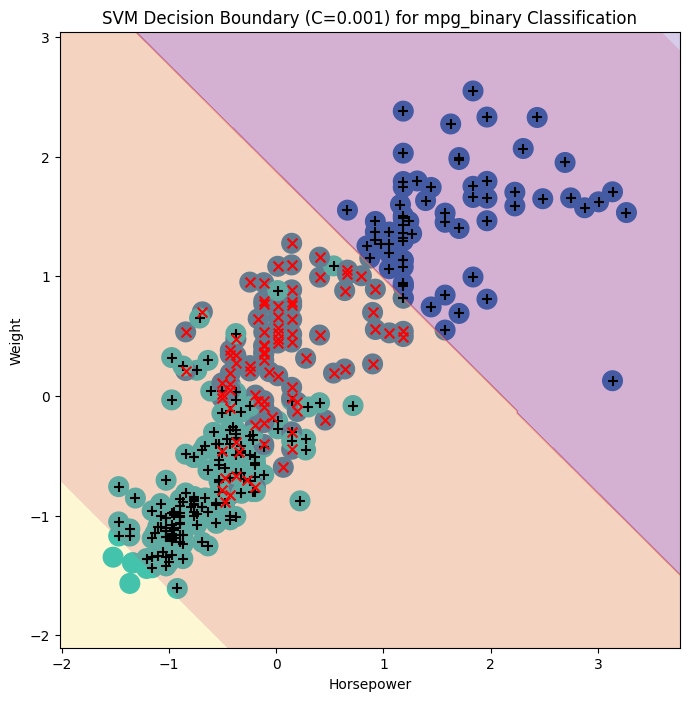

In [14]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from ISLP.svm import plot as plot_svm

# Step 1: Select features and target
X = auto[['horsepower', 'weight']]
y = auto['mpg_binary']

# Step 2: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split scaled data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Step 4: Train SVC on scaled data
svc = SVC(kernel='linear', C=0.001)
svc.fit(X_train, y_train)

# Step 5: Plot
fig, ax = plt.subplots(figsize=(8, 8))
plot_svm(X_train, y_train, svc, ax=ax)
ax.set_xlabel("Horsepower")
ax.set_ylabel("Weight")
ax.set_title("SVM Decision Boundary (C=0.001) for mpg_binary Classification")
plt.show()